# Convert2Images and Train
- Image Conversion taken from `https://github.com/thongonary/LCDJets/blob/master/Transform.py` - __tested!__
- For each row, produce an image from a matrix of features 
- Train... __testing...__

- The github repo contains a env setup bash script: `source analytix.sh analytix` 
- To launch, see the env setup in preprocessing_... and then:
```
pyspark --master yarn --packages org.diana-hep:root4j:0.1.6 --jars /afs/cern.ch/work/v/vkhriste/public/spark-root_2.11-0.1.16.jar --executor-memory 4G  --executor-cores 4 --num-executors 25 --files $KRB5CCNAME#krbcache --conf spark.executorEnv.KRB5CCNAME='FILE:$PWD/krbcache' --conf spark.driver.extraClassPath="/usr/lib/hadoop/EOSfs.jar" --conf spark.executorEnv.PYTHONPATH="/afs/cern.ch/user/v/vkhriste/.local/lib/python2.7/site-packages" --conf spark.executorEnv.LD_LIBRARY_PATH="/cvmfs/sft.cern.ch/lcg/views/LCG_88/x86_64-slc6-gcc49-opt/lib64:/cvmfs/sft.cern.ch/lcg/views/LCG_88/x86_64-slc6-gcc49-opt/lib:/cvmfs/sft.cern.ch/lcg/contrib/gcc/4.9/x86_64-slc6/lib64"
```

## Read in the Preprocessed Data
- QCD samples
- TTBar samples
- W+Jets samples

In [1]:
import sys
print sys.path

[u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/jakarta-regexp_jakarta-regexp-1.4.jar', u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/org.tukaani_xz-1.2.jar', u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/org.apache.bcel_bcel-5.2.jar', u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/org.diana-hep_root4j-0.1.6.jar', u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0', '', '/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/lib/py4j-0.10.4-src.zip', '/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python', '/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages', '/opt/rh/python27/root/usr/lib64/python27.zip', '/opt/rh/python27/root/usr/lib64/python2.7', '/opt/rh/python27/root/usr/lib64/python2.7/plat-lin

In [2]:
qcd_features = sqlContext.read.format("parquet").load("hdfs:/cms/bigdatasci/vkhriste/data/qcd_preprocessing/test_1530_12122017")
ttbar_features = sqlContext.read.format("parquet").load("hdfs:/cms/bigdatasci/vkhriste/data/ttbar_preprocessing/test_2200_11122017")
wjets_features = sqlContext.read.format("parquet").load("hdfs:/cms/bigdatasci/vkhriste/data/wjets_preprocessing/test_1030_12122017")

In [3]:
qcd_features.show()

+--------------------+--------------------+
|           hfeatures|           lfeatures|
+--------------------+--------------------+
|[100.228340148925...|[WrappedArray(99....|
|[42.2832412719726...|[WrappedArray(34....|
|[0.0, 12.81347084...|[WrappedArray(204...|
|[0.0, 65.22929382...|[WrappedArray(179...|
|[0.0, 16.83046531...|[WrappedArray(203...|
|[0.0, 4.743223190...|[WrappedArray(50....|
|[50.4907798767089...|[WrappedArray(51....|
|[0.0, 53.21599578...|[WrappedArray(61....|
|[0.0, 2.571652889...|[WrappedArray(46....|
|[41.7809562683105...|[WrappedArray(29....|
|[58.6198959350585...|[WrappedArray(40....|
|[0.0, 32.54497146...|[WrappedArray(28....|
|[53.9156837463378...|[WrappedArray(668...|
|[84.5948333740234...|[WrappedArray(127...|
|[0.0, 25.22752761...|[WrappedArray(70....|
|[96.4648742675781...|[WrappedArray(70....|
|[0.0, 18.52447128...|[WrappedArray(360...|
|[0.0, 9.786623001...|[WrappedArray(119...|
|[184.848709106445...|[WrappedArray(64....|
|[0.0, 59.09547805...|[WrappedAr

In [4]:
ttbar_features.show()

+--------------------+--------------------+
|           hfeatures|           lfeatures|
+--------------------+--------------------+
|[962.852188110351...|[WrappedArray(249...|
|[352.717723846435...|[WrappedArray(167...|
|[242.214546203613...|[WrappedArray(67....|
|[100.947238922119...|[WrappedArray(28....|
|[59.9977836608886...|[WrappedArray(64....|
|[493.494388580322...|[WrappedArray(52....|
|[267.234786987304...|[WrappedArray(241...|
|[206.327716827392...|[WrappedArray(63....|
|[383.656970977783...|[WrappedArray(135...|
|[173.195686340332...|[WrappedArray(76....|
|[69.5480575561523...|[WrappedArray(40....|
|[181.502624511718...|[WrappedArray(46....|
|[333.205291748046...|[WrappedArray(97....|
|[73.81298828125, ...|[WrappedArray(481...|
|[109.182903289794...|[WrappedArray(75....|
|[239.590858459472...|[WrappedArray(106...|
|[645.563568115234...|[WrappedArray(575...|
|[125.917373657226...|[WrappedArray(95....|
|[440.674312591552...|[WrappedArray(28....|
|[514.676177978515...|[WrappedAr

In [5]:
wjets_features.show()

+--------------------+--------------------+
|           hfeatures|           lfeatures|
+--------------------+--------------------+
|[0.0, 52.68512344...|[WrappedArray(185...|
|[0.0, 48.29389953...|[WrappedArray(349...|
|[0.0, 34.79087448...|[WrappedArray(220...|
|[0.0, 21.25173377...|[WrappedArray(285...|
|[0.0, 57.50206756...|[WrappedArray(148...|
|[46.7039146423339...|[WrappedArray(160...|
|[0.0, 15.00487327...|[WrappedArray(45....|
|[0.0, 79.79054260...|[WrappedArray(104...|
|[0.0, 41.56198120...|[WrappedArray(248...|
|[85.4285049438476...|[WrappedArray(199...|
|[0.0, 34.41744995...|[WrappedArray(47....|
|[0.0, 45.74290084...|[WrappedArray(43....|
|[0.0, 16.20509147...|[WrappedArray(35....|
|[0.0, 29.39954376...|[WrappedArray(44....|
|[0.0, 62.23700714...|[WrappedArray(174...|
|[0.0, 37.56029129...|[WrappedArray(27....|
|[0.0, 20.01223564...|[WrappedArray(37....|
|[0.0, 15.26028919...|[WrappedArray(37....|
|[0.0, 41.44536590...|[WrappedArray(59....|
|[0.0, 29.08719253...|[WrappedAr

## Step1 Build up the functionality
- various imports
- conversion function
- __Note:__ adding local site-package only needed for a driver!
- __Note:__ `reload(six)` is used because somehow default location of six is chosen (most likely during the import sys, six is loaded as well...) -> since it has been loaded, updating the `sys.path` will not influence that... __Have to reload the module__

In [6]:
import sys
sys.path.insert(0, "/afs/cern.ch/user/v/vkhriste/.local/lib/python2.7/site-packages")
import six
print six.__version__
reload(six)
print six.__version__

1.11.0
1.11.0


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time, os
from pyspark.sql import Row
from scipy import misc
from skimage import draw

print matplotlib.__version__
print np.__version__

2.1.1
1.13.3


In [8]:
sys.path

['/afs/cern.ch/user/v/vkhriste/.local/lib/python2.7/site-packages',
 u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/jakarta-regexp_jakarta-regexp-1.4.jar',
 u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/org.tukaani_xz-1.2.jar',
 u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/org.apache.bcel_bcel-5.2.jar',
 u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0/org.diana-hep_root4j-0.1.6.jar',
 u'/tmp/spark-b739c85d-1ebb-4218-b96b-2d2fa84c2244/userFiles-6a8f910d-bbb0-4841-b38f-014568535fc0',
 '',
 '/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/lib/py4j-0.10.4-src.zip',
 '/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python',
 '/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages',
 '/opt/rh/python27/root/usr/lib64/python27.zip',
 '/opt/rh/python27/

In [12]:
#from skimage import draw 

In [13]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors, Matrices

In [14]:
feature_variables = ['Energy', 'Px', 'Py', 'Pz', 'Pt', 'Eta', 'Phi', 
                    'vtxX', 'vtxY', 'vtxZ','ChPFIso', 'GammaPFIso', 'NeuPFIso',
                    'isChHad', 'isNeuHad', 'isGamma', 'isEle',  'isMu', 
                        #'Charge'
           ]


# In[259]:

colors = {'isMu' : 'green',
        'isEle': 'green',
         'isGamma':'blue',
         'isChHad' : 'red',
         'isNeuHad': 'yellow'}

shapes = {'isMu' : 5,
          'isEle': 5,
          'isGamma':3,
          'isChHad' : 4,
          'isNeuHad': 0}

c_colors = [colors[k] for k in feature_variables[13:]]+['black']
cc_colors = [np.asarray(matplotlib.colors.to_rgb(k)) for k in c_colors]
cc_shapes = [shapes[k] for k in feature_variables[13:]]+[0]

print c_colors
print cc_colors
print cc_shapes

['red', 'yellow', 'blue', 'green', 'green', 'black']
[array([ 1.,  0.,  0.]), array([ 1.,  1.,  0.]), array([ 0.,  0.,  1.]), array([ 0.        ,  0.50196078,  0.        ]), array([ 0.        ,  0.50196078,  0.        ]), array([ 0.,  0.,  0.])]
[4, 0, 3, 5, 5, 0]


In [15]:
def showImage(image):
    fig = plt.figure(frameon=False)
    plt.imshow(image.swapaxes(0,1))
    plt.axis('off')
    plt.savefig('fig.png', dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()

def create3D(data):
    max_eta = 5
    max_phi = np.pi
    res= 100
    neta = int(max_eta*res)
    nphi = int(max_phi*res)
    eeta = 2.*max_eta / float(neta)
    ephi = 2.*max_phi / float(nphi)
    def ieta( eta ): return (eta+max_eta) / eeta
    def iphi(phi) : return (phi+max_phi) / ephi
    blend = 0.3
    image = np.ones((neta,nphi,3), dtype = np.float32)
    
    before_loop = time.time()
    for ip in range(data.shape[0]):
        p_data = data[ip,:]
        eta = p_data[0]
        phi = p_data[1]
        if eta==0 and phi==0: 
            #print ip
            continue
        #pT = p_data[2]
        #lpT = min(max(np.log(pT)/5.,0.001), 10)*res/2.
        lpT = p_data[2]
        ptype = int(p_data[3])
        c = cc_colors[ ptype ]
        s = cc_shapes[ ptype ]
        R = lpT * res/1.5
        iee = ieta(eta)
        ip0 = iphi(phi)
        ip1 = iphi(phi+2*np.pi)
        ip2 = iphi(phi-2*np.pi)
        
        if s==0:
            xi0,yi0 = draw.circle(  iee, ip0,radius=R, shape=image.shape[:2])
            xi1,yi1 = draw.circle( iee, ip1, radius=R, shape=image.shape[:2])
            xi2,yi2 = draw.circle( iee, ip2, radius=R, shape=image.shape[:2]) 
            #if ptype == 5:
            #    print "MET",eta,phi
        else:
            nv = s
            vx = [iee + R*np.cos(ang) for ang in np.arange(0,2*np.pi, 2*np.pi/nv)]
            vy = [ip0 + R*np.sin(ang) for ang in np.arange(0,2*np.pi, 2*np.pi/nv)]
            vy1 = [ip1 + R*np.sin(ang) for ang in np.arange(0,2*np.pi, 2*np.pi/nv)]
            vy2 = [ip2 + R*np.sin(ang) for ang in np.arange(0,2*np.pi, 2*np.pi/nv)]
            xi0,yi0 = draw.polygon( vx, vy , shape=image.shape[:2])
            xi1,yi1 = draw.polygon( vx, vy1 , shape=image.shape[:2])
            xi2,yi2 = draw.polygon( vx, vy2 , shape=image.shape[:2])
            
        xi = np.concatenate((xi0,xi1,xi2))
        yi = np.concatenate((yi0,yi1,yi2))
        image[xi,yi,:] = (image[xi,yi,:] *(1-blend)) + (c*blend)
    after_loop = time.time()
    print "Time to process the loop inside create3D : %3.3f" % (after_loop - before_loop)
    return Vectors.dense(image.reshape((neta*nphi*3)))


def convert2image(row):
    """Assume that a row contains a non-empty 2D matrix of features"""
    start = time.time()
    #
    # this is for avoiding clashes on CC7 and SLC6 of the python versions
    #
    if np.__version__!="1.13.3":
        import sys
        sys.path.insert(0, "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages")
        reload(np)
    
    lmat = np.asarray(row.lfeatures, dtype=np.float32)
    hmat = np.asarray(row.hfeatures, dtype=np.float32)
    
    # low level features
    l_reduced = np.asarray(np.zeros((lmat.shape[0], 4)))
    l_reduced[:, 0] = lmat[:, 5]
    l_reduced[:, 1] = lmat[:, 6]
    l_reduced[:, 2] = np.minimum(np.log(np.maximum(lmat[:, 4], 1.001))/5., 10)
    l_reduced[:, 3] = np.argmax(lmat[:, 13:], axis=-1)
    
    # high level features
    h_reduced = np.zeros( (1, 4))
    h_reduced[0,2] = np.minimum(np.maximum(np.log(hmat[1])/5.,0.001), 10) # MET
    h_reduced[0,1] = hmat[2] # MET-phi
    h_reduced[0,3] = int(5) ## met type
    
    # concatenate the high and low level features
    reduced = np.concatenate((l_reduced, h_reduced), axis=0)
    
    # geneate the image (as a 3D matrix)
    before_create3D = time.time()
    img = create3D(reduced)
    
    before_tolist = time.time()
    l = img
    end = time.time()
    
    print "Tiem to procss a Row before create3D: %3.3f" % (before_create3D - start)
    print "Time to process a Row: %3.3f" % (end - start)
    print "Time to run tolist: %3.3f" % (end - before_tolist)
    
    return Row(image=l)

## RUN the pipeline: Get the images from preprocessed features
- qcd 
- ttbar
- wjets

In [16]:
before = time.time()
qcd_images = qcd_features\
    .rdd\
    .map(convert2image)\
    .toDF()
after = time.time()
print("Total Processing Time: %d seconds" % int(after - before))

Total Processing Time: 2 seconds


In [17]:
before = time.time()
ttbar_images = ttbar_features\
    .rdd\
    .map(convert2image)\
    .toDF()
after = time.time()
print("Total Processing Time: %d seconds" % int(after - before))

Total Processing Time: 5 seconds


In [18]:
before = time.time()
wjets_images = wjets_features\
    .rdd\
    .map(convert2image)\
    .toDF()
after = time.time()
print("Total Processing Time: %d seconds" % int(after - before))

Total Processing Time: 1 seconds


In [19]:
sample_qcd = qcd_features.take(10)

In [20]:
new_rows = []
for row in sample_qcd:
    new_rows.append(convert2image(row))
for row in new_rows:
    print row.image.array.shape

Time to process the loop inside create3D : 0.102
Tiem to procss a Row before create3D: 0.002
Time to process a Row: 0.106
Time to run tolist: 0.000
Time to process the loop inside create3D : 0.134
Tiem to procss a Row before create3D: 0.001
Time to process a Row: 0.137
Time to run tolist: 0.000
Time to process the loop inside create3D : 0.082
Tiem to procss a Row before create3D: 0.001
Time to process a Row: 0.085
Time to run tolist: 0.000
Time to process the loop inside create3D : 0.133
Tiem to procss a Row before create3D: 0.001
Time to process a Row: 0.136
Time to run tolist: 0.000
Time to process the loop inside create3D : 0.166
Tiem to procss a Row before create3D: 0.001
Time to process a Row: 0.169
Time to run tolist: 0.000
Time to process the loop inside create3D : 0.179
Tiem to procss a Row before create3D: 0.001
Time to process a Row: 0.182
Time to run tolist: 0.000
Time to process the loop inside create3D : 0.185
Tiem to procss a Row before create3D: 0.001
Time to process a R

## Validate the schema for the produced images

In [28]:
qcd_images.printSchema()

root
 |-- image: vector (nullable = true)



In [29]:
ttbar_images.printSchema()

root
 |-- image: vector (nullable = true)



In [30]:
wjets_images.printSchema()

root
 |-- image: vector (nullable = true)



## Validate the generated images
- qcd
- ttbar
- wjets

In [57]:
qcd_test_images = qcd_images.take(10)
ttbar_test_images = ttbar_images.take(10)
wjets_test_images = wjets_images.take(10)

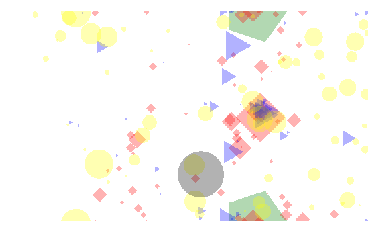

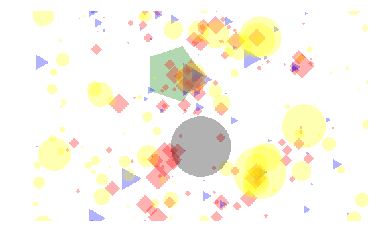

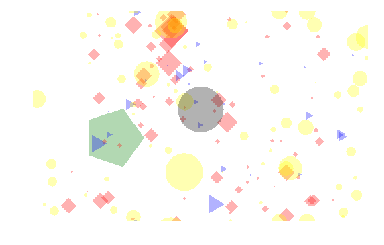

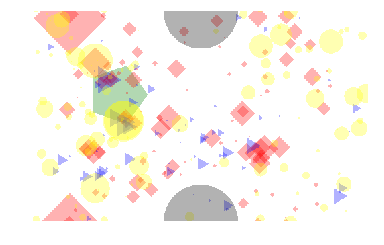

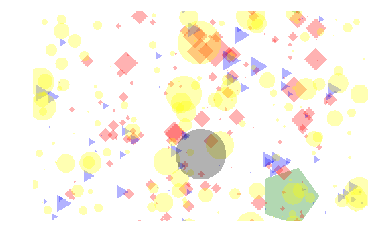

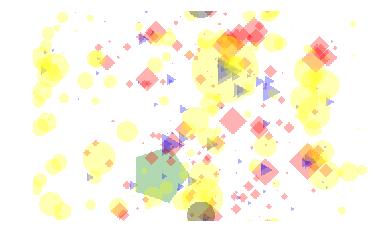

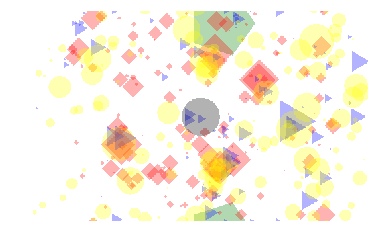

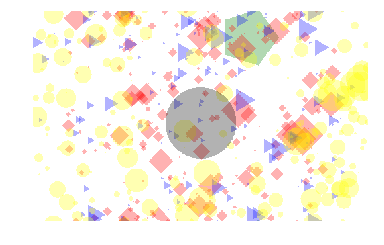

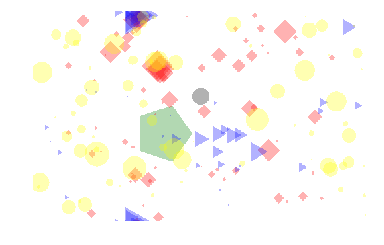

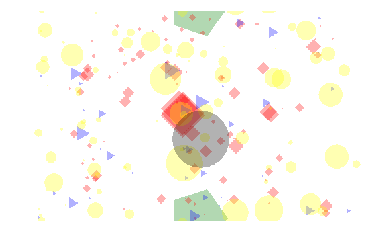

In [60]:
for x in qcd_test_images:
    img = x.image.array.reshape((500, 314, 3))
    showImage(img)

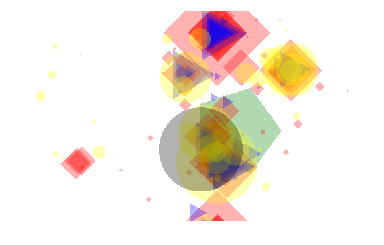

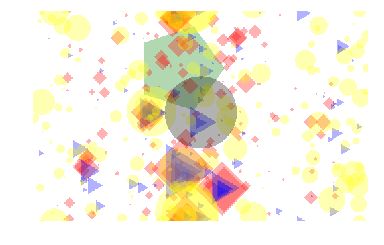

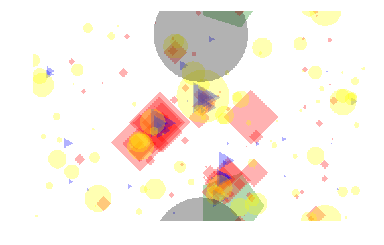

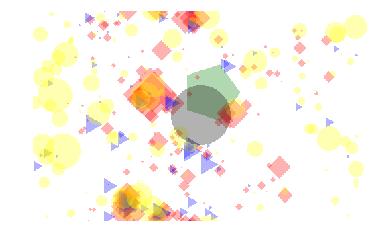

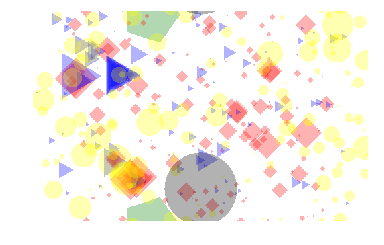

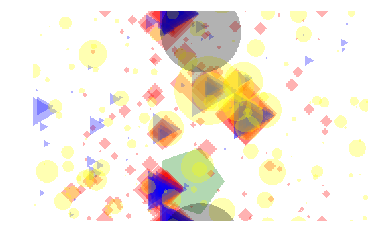

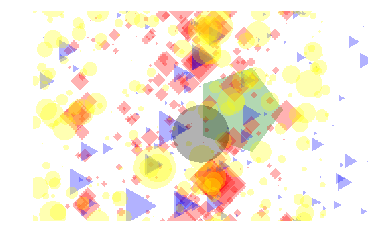

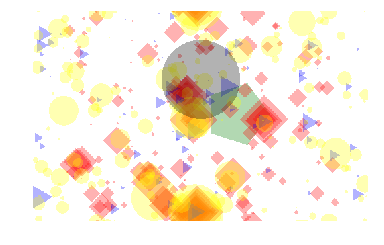

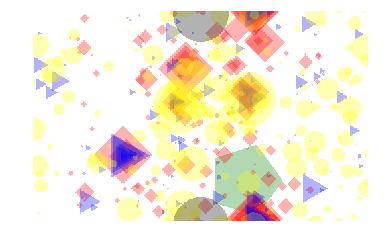

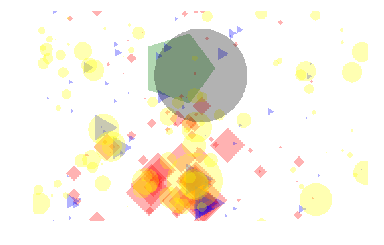

In [61]:
for x in ttbar_test_images:
    img = x.image.array.reshape((500, 314, 3))
    showImage(img)

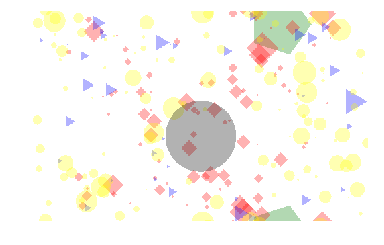

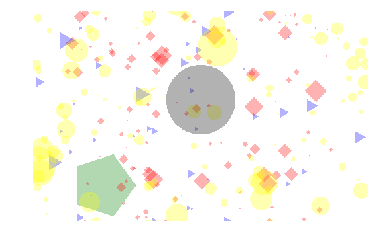

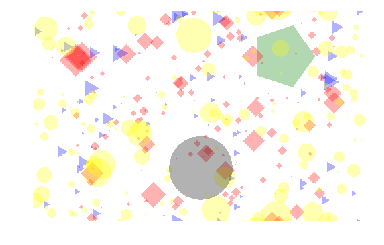

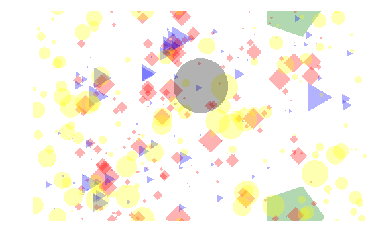

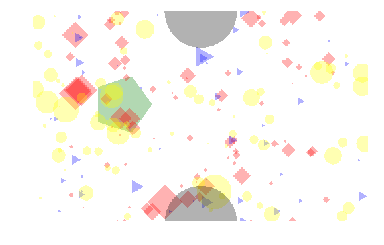

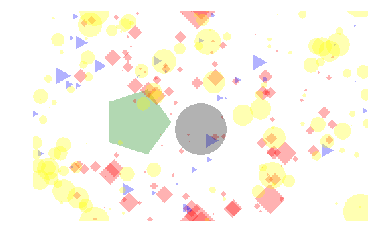

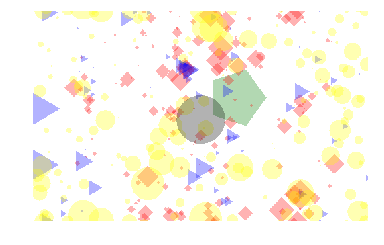

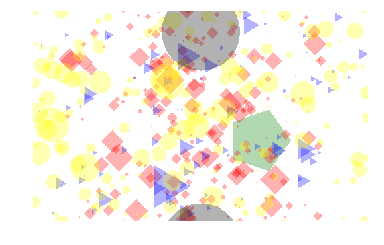

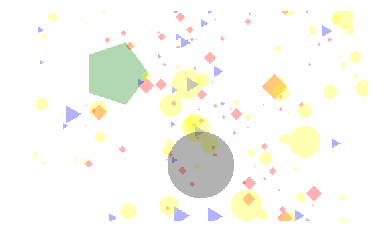

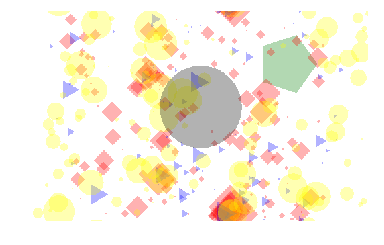

In [62]:
for x in wjets_test_images:
    img = x.image.array.reshape((500, 314, 3))
    showImage(img)

## Prepare the data for training
- Encode the labels
- split the data into train and test sets

In [31]:
from pyspark.sql.functions import lit
#from pyspark.ml.feature import StandardScaler
#from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.feature import OneHotEncoder
#from pyspark.ml.feature import MinMaxScaler
##from pyspark.ml.feature import StringIndexer
#from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#from distkeras.trainers import *
#from distkeras.predictors import *
#from distkeras.transformers import *
#from distkeras.evaluators import *
#from distkeras.utils import *

In [32]:
#
# assign labels in alphabetical order
#
qcd_label = 0
ttbar_label = 1
wjets_label = 2

#
# create new columns for that
#
qcd_sample = qcd_images.withColumn("label", lit(qcd_label))
ttbar_sample = ttbar_images.withColumn("label", lit(ttbar_label))
wjets_sample = wjets_images.withColumn("label", lit(wjets_label))

#
# combine all of that in just 1 data frame
#
data_sample = qcd_sample.union(ttbar_sample).union(wjets_sample)

In [ ]:
#
# Let's save the data at this point to hdfs
#
data_sample.write.parquet("hdfs:/cms/bigdatasci/vkhriste/data/images_all/test_17122017_0", mode="overwrite")

In [25]:
#
# perform a quick (__not that quick__) count of number of rows
#
#data_sample.count()

#
# Should be 39447519 events total
#

### Apply OneHotEncoder

In [26]:
#
# we have 3 classes for our Classifier
#
num_classes = 3
encoder = OneHotTransformer(num_classes, input_col="label", output_col="label_encoded")
data_sample_encoded = encoder.transform(data_sample)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 12.0 failed 4 times, most recent failure: Lost task 0.3 in stage 12.0 (TID 15, p05151113997207.cern.ch, executor 14): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/worker.py", line 163, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/worker.py", line 54, in read_command
    command = serializer._read_with_length(file)
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/serializers.py", line 169, in _read_with_length
    return self.loads(obj)
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/serializers.py", line 434, in loads
    return pickle.loads(obj)
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/distkeras/utils.py", line 5, in <module>
    from keras import backend as K
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/__init__.py", line 3, in <module>
    from . import utils
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/utils/__init__.py", line 6, in <module>
    from . import conv_utils
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/utils/conv_utils.py", line 3, in <module>
    from .. import backend as K
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/backend/__init__.py", line 83, in <module>
    from .tensorflow_backend import *
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 1, in <module>
    import tensorflow as tf
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/__init__.py", line 24, in <module>
    from tensorflow.python import *
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/__init__.py", line 49, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 72, in <module>
    raise ImportError(msg)
ImportError: Traceback (most recent call last):
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
ImportError: /lib64/libc.so.6: version `GLIBC_2.16' not found (required by /afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so)


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1435)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1423)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1422)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1422)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:802)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1650)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1605)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1594)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:628)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1918)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1931)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1944)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/worker.py", line 163, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/worker.py", line 54, in read_command
    command = serializer._read_with_length(file)
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/serializers.py", line 169, in _read_with_length
    return self.loads(obj)
  File "/afs/cern.ch/user/p/pkothuri/public/spark-2.1.0-bin-hadoop2.6/python/pyspark/serializers.py", line 434, in loads
    return pickle.loads(obj)
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/distkeras/utils.py", line 5, in <module>
    from keras import backend as K
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/__init__.py", line 3, in <module>
    from . import utils
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/utils/__init__.py", line 6, in <module>
    from . import conv_utils
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/utils/conv_utils.py", line 3, in <module>
    from .. import backend as K
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/backend/__init__.py", line 83, in <module>
    from .tensorflow_backend import *
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 1, in <module>
    import tensorflow as tf
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/__init__.py", line 24, in <module>
    from tensorflow.python import *
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/__init__.py", line 49, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 72, in <module>
    raise ImportError(msg)
ImportError: Traceback (most recent call last):
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
ImportError: /lib64/libc.so.6: version `GLIBC_2.16' not found (required by /afs/cern.ch/user/p/pkothuri/.local/lib/python2.7/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so)


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:99)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:282)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
